### Imports

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import datetime
import os
from pathlib import Path
# pip install xldr

## 0. Leitura do Ficheiro

In [2]:
# Guardar todos os outputs numa única pasta
output_folder = Path.cwd() / "output"
output_folder.mkdir(parents=True, exist_ok=True)

# Exemplo: mapa.save(output_folder / 'mapa_de_calor_portugal_Danielle.html')

### 0.1. Ficheiro INFsumaria_IU_2020.xls

In [3]:
p = Path.cwd()
data_folder = p.parent.parent / "data"
shape_folder = p.parent.parent / "shape"
file_path = data_folder / "INFsumaria_IU_2020.xls"

Sumario = pd.read_excel(file_path, header=6)

In [4]:
Sumario = Sumario.drop(columns=Sumario.columns[[0, 1, 4, 6, 10, 11, 16]])
Sumario["Distrito"] = Sumario["Distrito"].str.title()
Sumario["Concelho"] = Sumario["Concelho"].str.title()
Sumario["Freguesia"] = Sumario["Freguesia"].str.title()
Sumario

,Número,Estado,Importância,Início,Fecho Operacional,Duração (min),Código,Família,Espécie,Nome,...,Mortos,Feridos Graves,Feridos Ligeiros,Assistidos,Feridos Outros,Vitimas ANPC,Outras Vitimas,Reacendimento,Periodo,Descricao
0,2020140047023,Encerrada,Reduzida,2020-09-09 16:18:00.000,2020-09-09 20:20:00.000,242.0,2129,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Edifícios degradados ou devolutos,...,0,0,0,0,0,0,0,Não,Diurno,REDE MOVEL: 1139365008373506\nCOMENTÁRIO DE EN...
1,2020100019065,Encerrada,Reduzida,2020-04-09 13:05:00.000,2020-04-09 13:50:00.000,45.0,2101,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Habitacional,...,0,0,0,0,0,0,0,Não,Diurno,Chamine
2,2020040031227,Encerrada,Reduzida,2020-11-23 18:24:00.000,2020-11-23 18:52:00.000,28.0,2101,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Habitacional,...,0,0,0,0,0,0,0,Não,Diurno,NaN
3,2020170017600,Encerrada,Reduzida,2020-07-25 19:52:00.000,2020-07-25 20:50:00.000,58.0,2101,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Habitacional,...,0,0,0,0,0,0,0,Não,Diurno,REDE MOVEL: 1141442207284503\n-- Consequências...
4,2020040034232,Encerrada,Reduzida,2020-12-25 14:36:00.000,2020-12-25 15:35:00.000,59.0,2101,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Habitacional,...,0,0,0,0,0,0,0,Não,Diurno,REDE MOVEL:\n-- Consequências --\n-------- Exp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9261,2020110181139,Encerrada,Reduzida,2020-10-08 03:58:00.000,2020-10-08 04:34:00.000,36.0,2101,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Habitacional,...,0,0,0,0,0,0,0,Não,Nocturno,tacho ao lume
9262,2020060007466,Encerrada,Reduzida,2020-02-14 02:34:00.000,2020-02-14 04:14:00.000,100.0,2101,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Habitacional,...,0,0,0,0,0,0,0,Não,Nocturno,NaN
9263,2020110068225,Encerrada,Reduzida,2020-04-06 14:55:00.000,2020-04-06 15:54:00.000,59.0,2127,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,"Indústria, Oficina e Armazém",...,0,0,0,0,0,0,0,Não,Diurno,\n
9264,2020150003320,Falso Alarme,Reduzida,2020-01-10 16:33:00.000,2020-01-10 17:00:00.000,27.0,2127,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,"Indústria, Oficina e Armazém",...,0,0,0,0,0,0,0,Não,Diurno,NaN


In [5]:
Sumario.columns

Index(['Número', 'Estado ', 'Importância ', 'Início', 'Fecho Operacional',
       'Duração (min)', 'Código ', 'Família', 'Espécie ', 'Nome ', 'Distrito',
       'Concelho', 'Freguesia', 'Localidade', 'Latitude', 'Longitude',
       'Humanos Terr', 'Técnicos Terr', 'Humanos Aer', 'Técnicos Aer',
       'Mortos', 'Feridos Graves', 'Feridos Ligeiros', 'Assistidos',
       'Feridos Outros', 'Vitimas ANPC', 'Outras Vitimas', 'Reacendimento',
       'Periodo', 'Descricao'],
      dtype='object')

### 0.2. Ficheiro Relatorio_Danos_2020.xls

In [ ]:
file_path = data_folder / "Relatorio_Danos_2020.xls"
Dano = pd.read_excel(file_path, header=1)

In [28]:
Dano.drop(columns=Dano.columns[14], inplace=True)
Dano

,Entidade,Número,Data,Natureza,Data.1,Descição,Tipo Dano,Quantidade,Unidade,Valor Est.,Entidade.1,Meio,Meio INOP?,Valor Est..1,Quantidade.1,Meio.1,Valor Est..2
0,CDOS Santarém,2020140000003,2020-01-01 00:26:00,2101,2020-01-01 01:01:00,Chaminé,Danos Estruturas,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
1,CDOS Beja,2020020000012,2020-01-01 02:25:00,2101,2020-01-01 13:08:00,Cobertura| recheio da habitação| instalação el...,Habitação Habitada,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
2,CDOS Porto,2020130000138,2020-01-01 04:39:00,2101,2020-01-01 17:41:00,roupa,Habitação Habitada,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
3,CDOS Santarém,2020140000062,2020-01-01 09:54:00,2127,2020-01-01 13:27:00,Anexos de Oficina,Danos Estruturas,4.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
4,CDOS Santarém,2020140000062,2020-01-01 09:54:00,2127,2020-01-01 13:26:00,Oficina,Danos Estruturas,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,CDOS Portalegre,2020120026219,2020-12-30 20:00:00,2101,2020-12-30 20:48:00,chaminé e telhas partidas,Habitação Habitada,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
3240,CDOS Viseu,2020180064362,2020-12-30 20:27:00,2101,2020-12-30 22:37:00,Chaminé e forro da mesma,Habitacionais,0.0,Hectares,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
3241,CDOS Faro,2020080053372,2020-12-30 20:59:00,2101,2020-12-30 22:50:00,ardeu recheio da cozinha.,Habitação Habitada,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
3242,CDOS Leiria,2020100068590,2020-12-30 21:49:00,2101,2020-12-30 23:51:00,Sala e quarto danificados.,Habitação Habitada,2.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN


In [43]:
Dano.columns

Index(['Entidade', 'Número', 'Data', 'Natureza', 'Data.1', 'Descição',
       'Tipo Dano', 'Quantidade', 'Unidade', 'Valor Est.', 'Entidade.1',
       'Meio', 'Meio INOP?', 'Valor Est..1', 'Quantidade.1', 'Meio.1',
       'Valor Est..2'],
      dtype='object')

### 0.3. Juntar as bd

In [30]:
fogo = pd.merge(Sumario, Dano, on='Número', how='inner')
fogo

,Número,Estado,Importância,Início,Fecho Operacional,Duração (min),Código,Família,Espécie,Nome,...,Quantidade,Unidade,Valor Est.,Entidade.1,Meio,Meio INOP?,Valor Est..1,Quantidade.1,Meio.1,Valor Est..2
0,2020170017600,Encerrada,Reduzida,2020-07-25 19:52:00.000,2020-07-25 20:50:00.000,58.0,2101,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Habitacional,...,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2020050015799,Encerrada,Elevada,2020-07-06 18:40:00.000,2020-07-07 19:10:00.000,1470.0,2127,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,"Indústria, Oficina e Armazém",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,VTGC05,0.0
2,2020050015799,Encerrada,Elevada,2020-07-06 18:40:00.000,2020-07-07 19:10:00.000,1470.0,2127,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,"Indústria, Oficina e Armazém",...,NaN,NaN,NaN,Corpo de Bombeiros Voluntários da Sertã,VECI10,Não,0.0,0,NaN,NaN
3,2020050015799,Encerrada,Elevada,2020-07-06 18:40:00.000,2020-07-07 19:10:00.000,1470.0,2127,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,"Indústria, Oficina e Armazém",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,VECI10,0.0
4,2020050015799,Encerrada,Elevada,2020-07-06 18:40:00.000,2020-07-07 19:10:00.000,1470.0,2127,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,"Indústria, Oficina e Armazém",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,VECI10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2020180029404,Encerrada,Reduzida,2020-06-28 10:29:00.000,2020-06-28 11:22:00.000,53.0,2101,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Habitacional,...,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
3238,2020070006971,Encerrada,Reduzida,2020-04-04 19:13:00.000,2020-04-04 20:43:00.000,90.0,2101,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Habitacional,...,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
3239,2020170005958,Encerrada,Reduzida,2020-03-07 21:52:00.000,2020-03-07 22:53:00.000,61.0,2101,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Habitacional,...,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN
3240,2020130064519,Encerrada,Reduzida,2020-04-30 07:01:00.000,2020-04-30 09:30:00.000,149.0,2129,Riscos Tecnológicos,Incêndios Urbanos ou em Área Urbanizável,Edifícios degradados ou devolutos,...,1.0,Unidades,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN


In [31]:
fogo.columns

Index(['Número', 'Estado ', 'Importância ', 'Início', 'Fecho Operacional',
       'Duração (min)', 'Código ', 'Família', 'Espécie ', 'Nome ', 'Distrito',
       'Concelho', 'Freguesia', 'Localidade', 'Latitude', 'Longitude',
       'Humanos Terr', 'Técnicos Terr', 'Humanos Aer', 'Técnicos Aer',
       'Mortos', 'Feridos Graves', 'Feridos Ligeiros', 'Assistidos',
       'Feridos Outros', 'Vitimas ANPC', 'Outras Vitimas', 'Reacendimento',
       'Periodo', 'Descricao', 'Entidade', 'Data', 'Natureza', 'Data.1',
       'Descição', 'Tipo Dano', 'Quantidade', 'Unidade', 'Valor Est.',
       'Entidade.1', 'Meio', 'Meio INOP?', 'Valor Est..1', 'Quantidade.1',
       'Meio.1', 'Valor Est..2'],
      dtype='object')

## 1.1. Coordenadas dos acidentes

## 1.2. Distritos Maps

In [6]:
DistritoCount = Sumario["Distrito"].value_counts().reset_index()
DistritoCount

,Distrito,count
0,Lisboa,1779
1,Porto,1700
2,Setúbal,851
3,Braga,738
4,Aveiro,673
5,Faro,515
6,Leiria,495
7,Santarém,430
8,Coimbra,402
9,Viseu,396


In [7]:
file_path = shape_folder / "Distritos.shp"
Distrito = gpd.read_file(file_path)
Distrito = Distrito[(Distrito['NAME_1'] != 'Azores') & (Distrito['NAME_1'] != 'Madeira')]
# Renomeie a coluna 'NAME_2' para 'Distrito' para correspondência
Distrito.rename(columns={'NAME_1': 'Distrito'}, inplace=True)
Distrito["Distrito"] = Distrito["Distrito"].str.title()
Distrito

,ID_0,ISO,NAME_0,ID_1,Distrito,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,182,PRT,Portugal,1,Évora,PT.EV,0,07,Distrito,District,None,None,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466..."
1,182,PRT,Portugal,2,Aveiro,PT.AV,0,01,Distrito,District,None,None,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40..."
2,182,PRT,Portugal,3,Açores,PT.AZ,0,40,Regiões autônomas,Autonomous Region,None,Azores,"MULTIPOLYGON (((-25.08910 37.01562, -25.08904 ..."
3,182,PRT,Portugal,4,Beja,PT.BE,0,02,Distrito,District,None,None,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37..."
4,182,PRT,Portugal,5,Braga,PT.BR,0,03,Distrito,District,None,None,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543..."
5,182,PRT,Portugal,6,Bragança,PT.BA,0,04,Distrito,District,None,Braganza,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859..."
6,182,PRT,Portugal,7,Castelo Branco,PT.CB,0,05,Distrito,District,None,None,"POLYGON ((-7.29277 40.41613, -7.29026 40.41438..."
7,182,PRT,Portugal,8,Coimbra,PT.CO,0,06,Distrito,District,None,None,"POLYGON ((-8.71904 40.47155, -8.71902 40.47153..."
8,182,PRT,Portugal,9,Faro,PT.FA,0,08,Distrito,District,None,None,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36..."
9,182,PRT,Portugal,10,Guarda,PT.GU,0,09,Distrito,District,None,None,"MULTIPOLYGON (((-7.40951 40.92181, -7.40192 40..."


In [8]:
# Mescla os dados do seu_dataframe com as geometrias dos concelhos
mapa_data = Distrito.merge(DistritoCount, how='left', left_on='Distrito', right_on='Distrito')

# Crie um mapa folium centrado em Portugal
mapa = folium.Map(location=[39.5, -8.0], zoom_start=6)

# Adicione o mapa de calor com cores diferentes para cada distrito
Choropleth(
    geo_data=mapa_data,
    name='choropleth',
    data=mapa_data,
    columns=['Distrito', 'count'],
    key_on='feature.properties.Distrito',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Acidentes'
).add_to(mapa)

# Exiba o mapa
mapa.save(output_folder / 'ANEPCdistrito.html')

## 1.2. Concelho Maps

In [9]:
ConcelhoCount = Sumario["Concelho"].value_counts().reset_index()
ConcelhoCount.loc[ConcelhoCount['Concelho'] == 'Ponte De Sor', 'Concelho'] = 'Ponte De Sôr'
ConcelhoCount

,Concelho,count
0,Sintra,396
1,Vila Nova De Gaia,326
2,Porto,325
3,Cascais,209
4,Lisboa,202
...,...,...
271,Alvito,1
272,Sousel,1
273,Alcoutim,1
274,Crato,1


In [10]:
file_path = shape_folder / "concelhos.shp"
Concelho = gpd.read_file(file_path)
Concelho = Concelho[(Concelho['NAME_1'] != 'Azores') & (Concelho['NAME_1'] != 'Madeira')]
# Renomeie a coluna 'NAME_2' para 'Distrito' para correspondência
Concelho.rename(columns={'NAME_2': 'Concelho'}, inplace=True)
Concelho["Concelho"] = Concelho["Concelho"].str.title()

In [11]:
# Obter as strings que estão em "ConcelhoCount" e não em "Concelho"
strings_nao_comuns_concelho_count = ConcelhoCount[~ConcelhoCount['Concelho'].isin(Concelho['Concelho'])]['Concelho']
print(strings_nao_comuns_concelho_count)

# Obter as strings que estão em "Concelho" e não em "ConcelhoCount"
strings_nao_comuns_concelho = Concelho[~Concelho['Concelho'].isin(ConcelhoCount['Concelho'])]['Concelho']
strings_nao_comuns_concelho

23     Guimarães
105       Tavira
Name: Concelho, dtype: object


6          Mora
55    Barrancos
Name: Concelho, dtype: object

In [12]:
Concelho[Concelho["Concelho"].str.contains("G")]

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,Concelho,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
108,182,PRT,Portugal,8,Coimbra,108,Góis,PT.CO.GO,0,0606,Concelho,Municipality,None,None,"POLYGON ((-8.14760 40.21051, -8.14694 40.21041..."
141,182,PRT,Portugal,10,Guarda,140,Gouveia,PT.GU.GO,0,0906,Concelho,Municipality,None,None,"POLYGON ((-7.52844 40.60437, -7.52858 40.60416..."
142,182,PRT,Portugal,10,Guarda,141,Guarda,PT.GU.GU,0,0907,Concelho,Municipality,None,None,"POLYGON ((-7.20184 40.70095, -7.20151 40.70087..."
160,182,PRT,Portugal,11,Leiria,159,Marinha Grande,PT.LE.MG,0,1010,Concelho,Municipality,None,None,"POLYGON ((-8.90277 39.88337, -8.90154 39.88306..."
162,182,PRT,Portugal,11,Leiria,161,Pedrógão Grande,PT.LE.PG,0,1013,Concelho,Municipality,None,None,"POLYGON ((-8.16393 40.03284, -8.16387 40.03282..."
201,182,PRT,Portugal,14,Portalegre,200,Gavião,PT.PA.GA,0,1209,Concelho,Municipality,None,None,"POLYGON ((-7.95539 39.56439, -7.95528 39.56437..."
211,182,PRT,Portugal,15,Porto,210,Gondomar,PT.PO.GO,0,1304,Concelho,Municipality,None,None,"POLYGON ((-8.52709 41.20303, -8.52357 41.20060..."
225,182,PRT,Portugal,15,Porto,224,Vila Nova De Gaia,PT.PO.VG,0,1317,Concelho,Municipality,None,None,"POLYGON ((-8.67251 41.14737, -8.67091 41.14652..."
237,182,PRT,Portugal,16,Santarém,236,Golegã,PT.SA.GO,0,1412,Concelho,Municipality,None,None,"POLYGON ((-8.43573 39.45612, -8.43596 39.45592..."
251,182,PRT,Portugal,17,Setúbal,250,Grândola,PT.SE.GR,0,1505,Concelho,Municipality,None,None,"MULTIPOLYGON (((-8.79857 38.39042, -8.79875 38..."


In [13]:
# Mescla os dados do seu_dataframe com as geometrias dos concelhos
mapa_data = Concelho.merge(ConcelhoCount, how='left', left_on='Concelho', right_on='Concelho')

# Crie um mapa folium centrado em Portugal
mapa = folium.Map(location=[39.5, -8.0], zoom_start=6)

# Adicione o mapa de calor com cores diferentes para cada distrito
Choropleth(
    geo_data=mapa_data,
    name='choropleth',
    data=mapa_data,
    columns=['Concelho', 'count'],
    key_on='feature.properties.Concelho',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Acidentes'
).add_to(mapa)

# Exiba o mapa
mapa.save(output_folder / 'ANEPCconcelho.html')

## 1.3. Freguesia Maps

In [14]:
FreguesiaCount = Sumario["Freguesia"].value_counts().reset_index()
FreguesiaCount

,Freguesia,count
0,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau E ...",89
1,Portimão,85
2,"Oeiras E S. Julião Da Barra, Paço De Arcos E C...",77
3,Cascais E Estoril,76
4,Faro (Sé E São Pedro),75
...,...,...
1623,Briteiros Santo Estêvão E Donim,1
1624,Basto,1
1625,"Espírito Santo, Nossa Senhora Da Graça E São S...",1
1626,Covas Do Douro,1


In [15]:
file_path = shape_folder / "Cont_AAD_CAOP2017.shp"
Freguesia = gpd.read_file(file_path)
Freguesia["Distrito"] = Freguesia["Distrito"].str.title()
Freguesia["Concelho"] = Freguesia["Concelho"].str.title()
Freguesia["Freguesia"] = Freguesia["Freguesia"].str.title()
Freguesia

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,geometry
0,080106,Albufeira E Olhos De Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.09,4117.69,Albufeira e Olhos de Água,"POLYGON ((-13243.458 -288011.973, -13244.464 -..."
1,081504,Sagres,Vila Do Bispo,Faro,ÁREA PRINCIPAL,3431.83,3436.91,Sagres,"POLYGON ((-67806.358 -291271.354, -67809.689 -..."
2,080106,Albufeira E Olhos De Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15487.120 -287903.523, -15487.725 -..."
3,080106,Albufeira E Olhos De Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15520.560 -287893.679, -15521.650 -..."
4,080106,Albufeira E Olhos De Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15531.602 -287884.483, -15532.205 -..."
...,...,...,...,...,...,...,...,...,...
3218,160307,Fiães,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,1121.27,1121.27,Fiães,"POLYGON ((-6958.588 271490.176, -6819.697 2714..."
3219,160323,União Das Freguesias De Vila E Roussas,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,1150.87,1150.87,Vila e Roussas,"POLYGON ((-7410.359 271732.200, -7426.438 2717..."
3220,160322,União Das Freguesias De Prado E Remoães,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,366.75,366.75,Prado e Remoães,"POLYGON ((-10963.311 272457.595, -10986.160 27..."
3221,160320,União Das Freguesias De Chaviães E Paços,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,847.90,847.90,Chaviães e Paços,"POLYGON ((-6958.588 271490.176, -7410.359 2717..."


In [16]:
# Mescla os dados do seu_dataframe com as geometrias dos concelhos
mapa_data = Freguesia.merge(FreguesiaCount, how='left', left_on='Freguesia', right_on='Freguesia')

# Crie um mapa folium centrado em Portugal
mapa = folium.Map(location=[39.5, -8.0], zoom_start=6)

# Adicione o mapa de calor com cores diferentes para cada distrito
Choropleth(
    geo_data=mapa_data,
    name='choropleth',
    data=mapa_data,
    columns=['Freguesia', 'count'],
    key_on='feature.properties.Freguesia',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Acidentes'
).add_to(mapa)

# Exiba o mapa
mapa.save(output_folder / 'ANEPCfreguesia.html')

In [17]:
# Obter as strings que estão em "FreguesiaCount" e não em "Freguesia"
strings_nao_comuns_freguesia_count = FreguesiaCount[~FreguesiaCount['Freguesia'].isin(Freguesia['Freguesia'])]['Freguesia']
print(strings_nao_comuns_freguesia_count)

# Obter as strings que estão em "Freguesia" e não em "FreguesiaCount"
strings_nao_comuns_freguesia = Freguesia[~Freguesia['Freguesia'].isin(FreguesiaCount['Freguesia'])]['Freguesia']
strings_nao_comuns_freguesia

0       Cedofeita, Ildefonso, Sé, Miragaia, Nicolau E ...
2       Oeiras E S. Julião Da Barra, Paço De Arcos E C...
3                                       Cascais E Estoril
4                                   Faro (Sé E São Pedro)
6                                         Queluz E Belas 
                              ...                        
1593                                       Matas E Cercal
1614          Brogueira, Parceiros De Igreja E Alcorochel
1617                             Lagos Da Beira E Lajeosa
1623                      Briteiros Santo Estêvão E Donim
1625    Espírito Santo, Nossa Senhora Da Graça E São S...
Name: Freguesia, Length: 506, dtype: object


11                               São Gonçalo De Lagos
12      União Das Freguesias De Faro (Sé E São Pedro)
13                               São Gonçalo De Lagos
14                               São Gonçalo De Lagos
16                               São Gonçalo De Lagos
                            ...                      
3214                                            Penso
3219           União Das Freguesias De Vila E Roussas
3220          União Das Freguesias De Prado E Remoães
3221         União Das Freguesias De Chaviães E Paços
3222                                        Cristoval
Name: Freguesia, Length: 1721, dtype: object

# Gráficos

In [32]:
Sumario.columns

Index(['Número', 'Estado ', 'Importância ', 'Início', 'Fecho Operacional',
       'Duração (min)', 'Código ', 'Família', 'Espécie ', 'Nome ', 'Distrito',
       'Concelho', 'Freguesia', 'Localidade', 'Latitude', 'Longitude',
       'Humanos Terr', 'Técnicos Terr', 'Humanos Aer', 'Técnicos Aer',
       'Mortos', 'Feridos Graves', 'Feridos Ligeiros', 'Assistidos',
       'Feridos Outros', 'Vitimas ANPC', 'Outras Vitimas', 'Reacendimento',
       'Periodo', 'Descricao'],
      dtype='object')

In [51]:
especieFogo = Sumario["Nome "].value_counts().reset_index()
especieFogo

,Nome,count
0,Habitacional,6473
1,"Indústria, Oficina e Armazém",866
2,Edifícios degradados ou devolutos,620
3,Hotelaria e Restauração,421
4,Áreas Comerciais e Gares de Transportes,187
5,"Exercício em Indústria, Oficina e Armazém",125
6,Exercício em Parque Escolar,105
7,Parque Escolar,95
8,Hospitalares e Lares de Idosos,76
9,Exercícios em Áreas Comerciais e Gares de Tran...,41


<Axes: xlabel='Nome ', ylabel='count'>

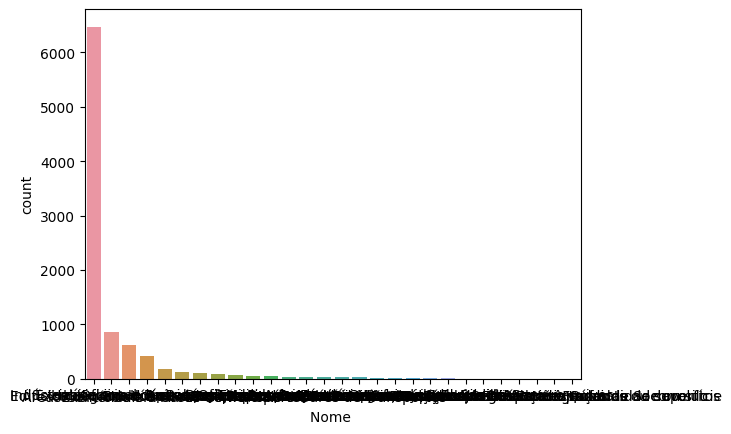

In [50]:
sns.barplot(data=especieFogo, x='Nome ', y="count")